In [ ]:
from google.colab import files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from google.colab import files
uploaded = files.upload()
data_file = "MatchTimelinesFirst15.csv"
LOLdata = pd.read_csv(data_file, index_col= "matchId")
LOLdata = LOLdata.iloc[:,1:]
LOLdata.iloc[:,0]



#explore regularization, like lasso or sth to remove some attributes. To see what weights it gave me.  
#discribe the expert knowledge. write explanation about those. 
#write down all I know about the game
#remeber to bootstarp/cross validation
#sigmoid can output actual value. Maybe this threshold should be lower or higher. Think about changing the threshold
#trying to use different Ks. 
#PCA if doesn't work

Saving MatchTimelinesFirst15.csv to MatchTimelinesFirst15 (1).csv


matchId
3493250918    0
3464936341    0
3428425921    1
3428347390    0
3428350940    1
             ..
3475682007    0
3500987969    1
3496592883    0
3491705900    1
3478246638    0
Name: blue_win, Length: 48651, dtype: int64

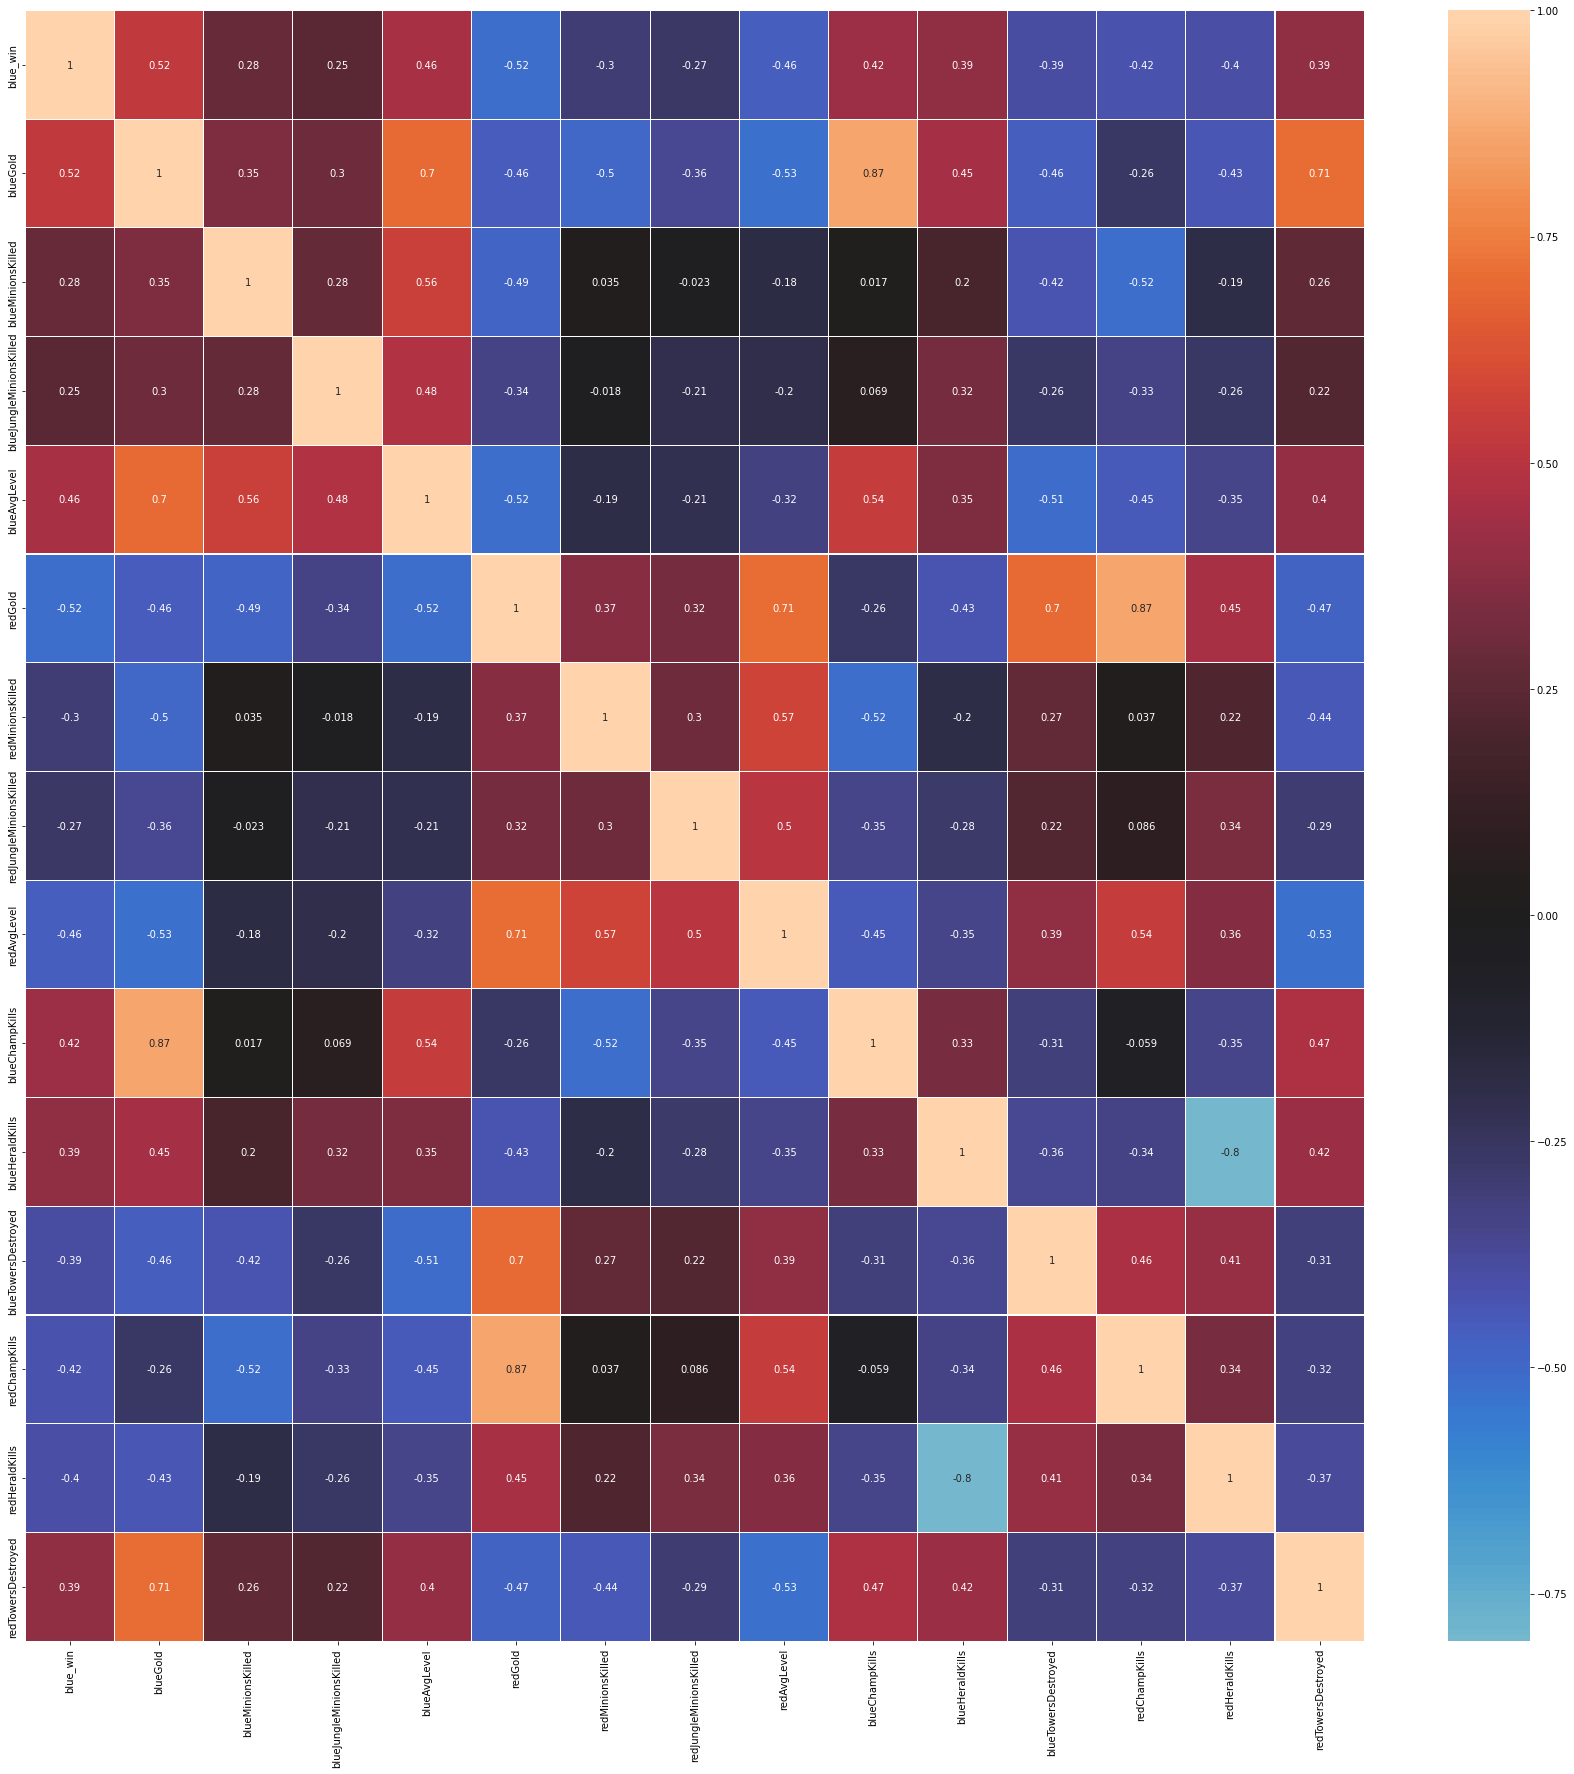

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(30,30)) 
corr = LOLdata.corr()
sns.heatmap(corr, center=0, annot=True, linewidths=.1, ax=ax)

In [ ]:
# y = np.array(LOLdata.iloc[:, 1])
# print(y)
# X = np.array(LOLdata.iloc[:, 2:21])
# print(x)
# nowards = np.array(LOLdata.iloc[:, 4:21])
clean = LOLdata.copy()

y = np.array(clean.iloc[:, 0])


[[0.36264105 0.68358209 0.54268293 ... 0.27906977 0.5        0.1       ]
 [0.47317421 0.50746269 0.2195122  ... 0.44186047 0.5        0.        ]
 [0.67611896 0.67462687 0.56097561 ... 0.25581395 0.         0.4       ]
 ...
 [0.3995973  0.56119403 0.56097561 ... 0.39534884 0.75       0.1       ]
 [0.4657494  0.64179104 0.51829268 ... 0.27906977 0.         0.        ]
 [0.30471077 0.6119403  0.49390244 ... 0.30232558 0.25       0.        ]]
(48651, 14)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


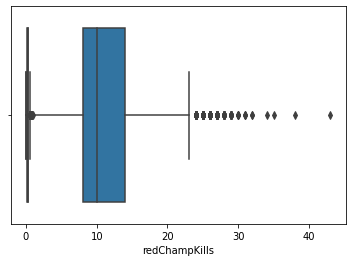

In [ ]:
import seaborn as sns
sns.boxplot(clean['redChampKills'])
from scipy import stats
import numpy as np
from sklearn import preprocessing
#z = np.abs(stats.zscore(clean['blueDeaths']))
#print(z)
#print(np.where(z > 3))
#outliers = np.where(z > 3)
#outliers.tolist()
#BlueClean.drop(outliers)
all_no_outliers = clean.copy()
# blue_no_outliers = blue_no_outliers.loc[BlueClean['blueWardsPlaced'] 
#                                         <= 50]
# blue_no_outliers = blue_no_outliers.loc[BlueClean['blueWardsPlaced'] 
#                                         >= 2]
# blue_no_outliers = blue_no_outliers.loc[blue_no_outliers['blueWardsDestroyed'] 
#                                         <= np.quantile(blue_no_outliers['blueWardsDestroyed'],q=0.99)]
# blue_no_outliers = blue_no_outliers.loc[blue_no_outliers['blueWardsDestroyed'] 
#                                         >= 1]


# all_no_outliers = all_no_outliers.loc[all_no_outliers['blueChampKills'] 
#                                         <= np.quantile(all_no_outliers['blueChampKills'],q=0.99)]
# all_no_outliers = all_no_outliers.loc[all_no_outliers['redChampKills'] 
#                                         <= np.quantile(all_no_outliers['redChampKills'],q=0.99)]
# all_no_outliers = all_no_outliers.loc[all_no_outliers['blueAssists'] 
#                                         <= np.quantile(all_no_outliers['blueAssists'],q=0.99)]
# all_no_outliers = all_no_outliers.loc[all_no_outliers['redAssists'] 
#                                         <= np.quantile(all_no_outliers['redAssists'],q=0.99)]



names = all_no_outliers.columns
y = np.array(all_no_outliers.iloc[:, 0])
for attribute in all_no_outliers.columns:
    min = all_no_outliers[attribute].min()
    max = all_no_outliers[attribute].max()
    divider = max - min
    all_no_outliers[attribute] = ((all_no_outliers[attribute]-min)/divider)
#print(all_no_outliers)
sns.boxplot(all_no_outliers['redChampKills'])

X = np.array(all_no_outliers.iloc[:, 1:])
print(X)
print(X.shape)

# X = np.array(blue_no_outliers.iloc[:, 2:])
# print(X.shape)
# nowards = np.array(blue_no_outliers.iloc[:, 4:])
# y = np.array(blue_no_outliers.iloc[:, 1])
#print(y)
#sns.boxplot(blue_no_outliers['blueWardsPlaced'])

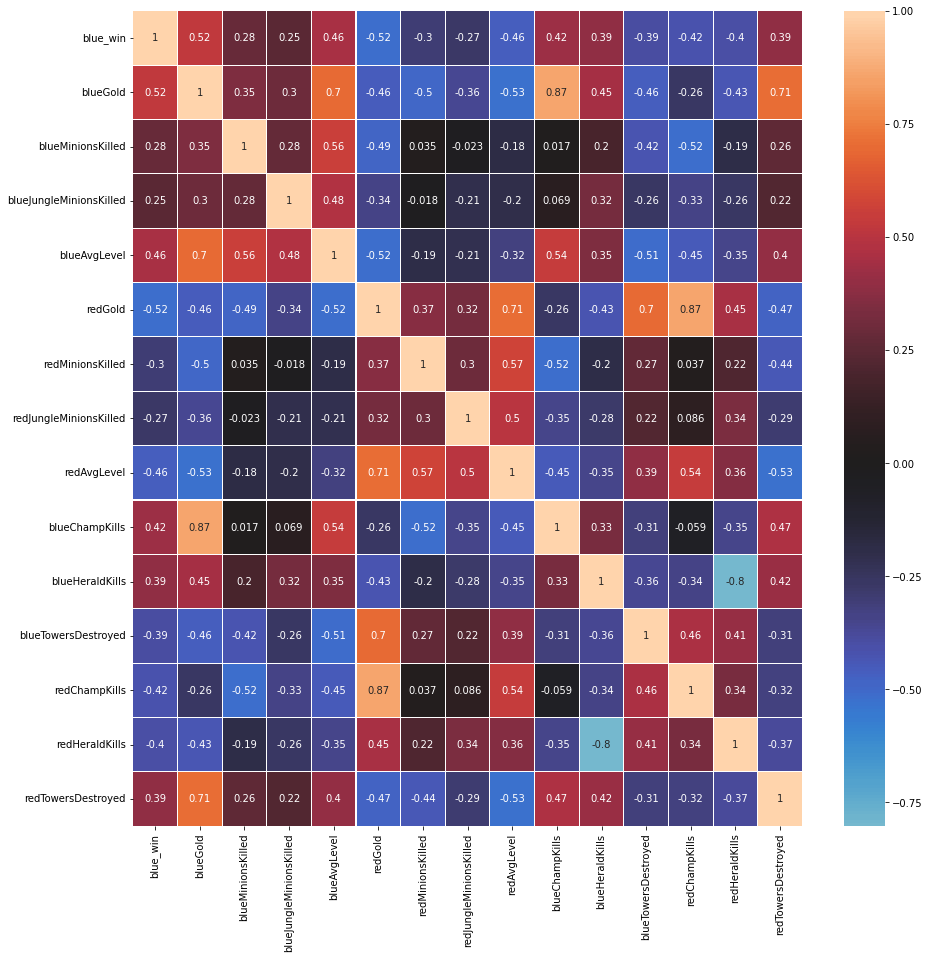

In [ ]:
fig, ax = plt.subplots(figsize=(15,15)) 
corr = all_no_outliers.corr()
sns.heatmap(corr, center=0, annot=True, linewidths=.1, ax=ax)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
copy = all_no_outliers.copy()
#X2_train, X2_test, y_train, y_test = train_test_split(nowards, y, test_size=0.33)


In [ ]:
#look at the course demo for generalization and lasso regulation
regr =LogisticRegression(max_iter=1000000000000000000)
regr.fit(X_train,y_train)
trainscore = regr.score(X_train,y_train)
testscore = regr.score(X_test,y_test)
print(trainscore,testscore)
print(regr.coef_)
coef = regr.coef_
print(copy.columns[1], regr.coef_[0][0])
print(copy.columns[4], regr.coef_[0][3])
print(copy.columns[5], regr.coef_[0][4])
print(copy.columns[8], regr.coef_[0][7])
# regr2 = LogisticRegression()
# regr2.fit(X2_train,y_train)
# trainscore2 = regr2.score(X2_train,y_train)
# testscore2 = regr2.score(X2_test,y_test)
# print(trainscore2,testscore2)
cv_scores = cross_val_score(regr, X, y, cv=10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

0.7879801202601546 0.7864216754905013
[[ 6.22771292  0.82804446  0.64168204  2.92094989 -6.00642261 -1.100237
  -0.91035294 -4.54265957  2.89920199  0.67025437 -0.52567373 -3.17639486
  -0.76803685 -0.61661395]]
blueGold 6.227712917873046
blueAvgLevel 2.92094988823152
redGold -6.006422613738462
redAvgLevel -4.542659573751325
[0.78750514 0.78705036 0.7979445  0.78129496 0.78828366 0.78766701
 0.78067831 0.78314491 0.77944502 0.79856115]
cv_scores mean:0.7871575024637679


In [ ]:
X_all = np.array(all_no_outliers.iloc[:, 1:])

y1 = np.array(all_no_outliers.iloc[:, 0])

print(all_no_outliers.iloc[:, 0])
print(X_all.shape)

matchId
3493250918    0.0
3464936341    0.0
3428425921    1.0
3428347390    0.0
3428350940    1.0
             ... 
3475682007    0.0
3500987969    1.0
3496592883    0.0
3491705900    1.0
3478246638    0.0
Name: blue_win, Length: 48651, dtype: float64
(48651, 14)


In [ ]:

X3_train, X3_test, y1_train, y1_test = train_test_split(X_all, y1, test_size=0.33)
regr3 =LogisticRegression(max_iter= 10000000000)
regr3.fit(X3_train,y1_train)
trainscore3 = regr3.score(X3_train,y1_train)
testscore3 = regr3.score(X3_test,y1_test)
print(trainscore3,testscore3)


0.7882562277580071 0.7852382435378387


In [ ]:
categorical = all_no_outliers.copy()


for i in range(len(categorical.columns)-1):
    labels = [1,2,3,4,5,6,7,8,9,10]
    categorical.iloc[i+1] = pd.cut(categorical.iloc[i+1], 10, labels = labels, duplicates= 'drop')
    print(i)
X_cat = np.array(categorical.iloc[:, 1:])

y_cat = np.array(categorical.iloc[:, 0])
X4_train, X4_test, y4_train, y4_test = train_test_split(X_cat, y_cat, test_size=0.33)

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [ ]:
#break values into bins, convert results into categorical.
#either equal value or equal frequency, consider that seriously
#break into intervals, still keep them numeric. 
#then run on multinomial
from sklearn.naive_bayes import MultinomialNB, GaussianNB, CategoricalNB
mclf = MultinomialNB()
mclf.fit(X4_train, y4_train)
train_score = mclf.score(X4_train, y4_train)
print(train_score)
test_score = mclf.score(X4_test,y4_test)
print(test_score)
cv_scores = cross_val_score(mclf, X_cat, y_cat, cv=10)
print(cv_scores)
print('Multinomiual cv_scores mean:{}'.format(np.mean(cv_scores)))


gclf = GaussianNB()
gclf.fit(X4_train, y4_train)
train_score = gclf.score(X4_train, y4_train)
print(train_score)
test_score = gclf.score(X4_test,y4_test)
print(test_score)
cv_scores = cross_val_score(gclf, X_cat, y_cat, cv=10)
print(cv_scores)
print('Gaussian cv_scores mean:{}'.format(np.mean(cv_scores)))



0.7436802061602651
0.7462472749922142


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


[0.74886971 0.74779034 0.75354573 0.74429599 0.74799589 0.74655704
 0.73833505 0.73340185 0.74141829 0.74224049]
Multinomiual cv_scores mean:0.7444450386493694
0.7417167750644251
0.7443164123326067


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


[0.77887382 0.75560123 0.75991778 0.75231244 0.75601233 0.76320658
 0.76012333 0.75190134 0.75354573 0.76505653]
Gaussian cv_scores mean:0.7596551105073314


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#scale based on correlation.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X3_train, y1_train)
print(knn.score(X3_train, y1_train))
print(knn.score(X3_test, y1_test))
cv_scores = cross_val_score(knn, X, y, cv=10)
print(cv_scores)
print('KNN3 cv_scores mean:{}'.format(np.mean(cv_scores)))
#scale based on correlation.
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(X3_train, y1_train)
print(knn.score(X3_train, y1_train))
print(knn.score(X3_test, y1_test))
cv_scores = cross_val_score(knn, X, y, cv=10)
print(cv_scores)
print('KNN3 distance cv_scores mean:{}'.format(np.mean(cv_scores)))


0.8557491716775064
0.7352226720647773
[0.72749692 0.73956835 0.73299075 0.73669065 0.74018499 0.74285714
 0.72641316 0.7377184  0.7270298  0.73586845]
KNN3 cv_scores mean:0.7346818602894679
1.0
0.7350981002802865
[0.72770242 0.7397739  0.7327852  0.7364851  0.73997945 0.74326824
 0.72600206 0.73751285 0.72661871 0.7352518 ]
KNN3 distance cv_scores mean:0.7345379711731759


In [ ]:
# from sklearn.model_selection import GridSearchCV

# #create new a knn model
# new_knn = KNeighborsClassifier(weights='distance')

# #create a dictionary of all values we want to test for n_neighbors
# grid_dictionary = {'n_neighbors': np.arange(1,35)}


# #use gridsearch to test all values for n_neighbors
# GScv = GridSearchCV(new_knn, grid_dictionary, cv=20)

# #fit model to data
# GScv.fit(X,y)

# new_knn = KNeighborsClassifier(weights='distance')

# #create a dictionary of all values we want to test for n_neighbors
# grid_dictionary = {'n_neighbors': np.arange(1,50)}
# print(GScv.best_params_)

# new_knn2 = KNeighborsClassifier()
# grid_dictionary = {'n_neighbors': np.arange(1,35)}


# #use gridsearch to test all values for n_neighbors
# GScv = GridSearchCV(new_knn, grid_dictionary, cv=20)

# #fit model to data
# GScv.fit(X,y)

# new_knn = KNeighborsClassifier(weights='distance')

# #create a dictionary of all values we want to test for n_neighbors
# grid_dictionary = {'n_neighbors': np.arange(1,50)}
# print(GScv.best_params_)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=33,weights='distance')
knn.fit(X3_train, y1_train)
print(knn.score(X3_train, y1_train))
print(knn.score(X3_test, y1_test))
cv_scores = cross_val_score(knn, X, y, cv=10)
print(cv_scores)
print('KNN3 distance cv_scores mean:{}'.format(np.mean(cv_scores)))
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X3_train, y1_train)
print(knn.score(X3_train, y1_train))
print(knn.score(X3_test, y1_test))
cv_scores = cross_val_score(knn, X, y, cv=10)
print(cv_scores)
print('KNN3 distance cv_scores mean:{}'.format(np.mean(cv_scores)))

1.0
0.7770787916536904
[0.76962598 0.77595067 0.78150051 0.77122302 0.78499486 0.77800617
 0.77225077 0.77040082 0.77327852 0.78417266]
KNN3 distance cv_scores mean:0.7761403982327615
0.7911400171800221
0.7778262223606354
[0.77044801 0.77677287 0.78006166 0.77225077 0.78335046 0.77738952
 0.77368962 0.77081192 0.77451182 0.78458376]
KNN3 distance cv_scores mean:0.7763870411509439


1.0
0.6974151354718157


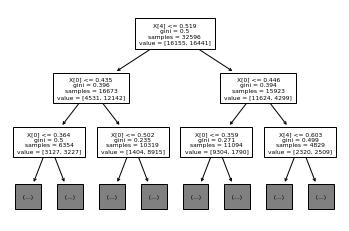

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct.fit(X3_train, y1_train)
print(dct.score(X3_train, y1_train))
print(dct.score(X3_test, y1_test))
from sklearn import tree
tree.plot_tree(dct, max_depth = 2, fontsize = 6)
#print the decision tree
plt.show()

In [ ]:
print(copy.iloc[:, 5])
print(X.shape)
print(copy.iloc[:, 1])

matchId
3493250918    0.510046
3464936341    0.610822
3428425921    0.490958
3428347390    0.668468
3428350940    0.441904
                ...   
3475682007    0.717799
3500987969    0.438336
3496592883    0.638675
3491705900    0.503464
3478246638    0.613282
Name: redGold, Length: 48651, dtype: float64
(48651, 14)
matchId
3493250918    0.362641
3464936341    0.473174
3428425921    0.676119
3428347390    0.181677
3428350940    0.599312
                ...   
3475682007    0.464910
3500987969    0.396241
3496592883    0.399597
3491705900    0.465749
3478246638    0.304711
Name: blueGold, Length: 48651, dtype: float64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
#from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


In [ ]:
from sklearn import svm
#try different parameters, see how that changes
clf = svm.SVC()
clf.fit(X3_train, y1_train)
print(clf.score(X3_train, y1_train))
print(clf.score(X3_test, y1_test))
cv_scores = cross_val_score(clf, X, y, cv=10)
print(cv_scores)
print('SVC cv_scores mean:{}'.format(np.mean(cv_scores)))

0.7874585838753221
0.7878542510121458
[0.78771065 0.78622816 0.7975334  0.78232271 0.78828366 0.78787256
 0.78108941 0.78232271 0.77780062 0.79568345]
SVC cv_scores mean:0.7866847335941357


In [ ]:
from sklearn import svm
#try different parameters, see how that changes
clf = svm.SVC(kernel = 'poly')
clf.fit(X3_train, y1_train)
print(clf.score(X3_train, y1_train))
print(clf.score(X3_test, y1_test))
cv_scores = cross_val_score(clf, X, y, cv=10)
print(cv_scores)
print('SVC cv_scores mean:{}'.format(np.mean(cv_scores)))

0.7885323352558596
0.7886639676113361
[0.78812166 0.78848921 0.7967112  0.78191161 0.78972251 0.78807811
 0.78232271 0.78170606 0.77985612 0.79732785]
SVC cv_scores mean:0.7874247045907399


0.7871824763774696
0.7890999688570539
[0.78627209 0.78992806 0.7991778  0.78293936 0.78890031 0.78931141
 0.77965057 0.78396711 0.77985612 0.79732785]
SVC cv_scores mean:0.787733067377347


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


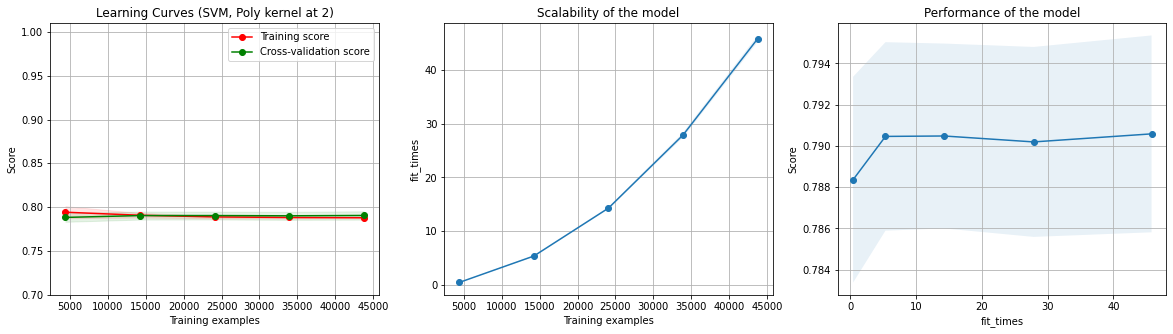

In [ ]:
clf = svm.SVC(kernel = 'poly',degree=2)
clf.fit(X3_train, y1_train)
print(clf.score(X3_train, y1_train))
print(clf.score(X3_test, y1_test))
cv_scores = cross_val_score(clf, X, y, cv=10)
print(cv_scores)
print('SVC cv_scores mean:{}'.format(np.mean(cv_scores)))
title = r"Learning Curves (SVM, Poly kernel at 2)"
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

plot_learning_curve(
    clf, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)
plt.show()

0.7883789422014971
0.7859233883525382
[0.78750514 0.78910586 0.79527235 0.78252826 0.79136691 0.78746146
 0.78191161 0.78129496 0.77923947 0.79609455]
SVC cv_scores mean:0.7871780574483516


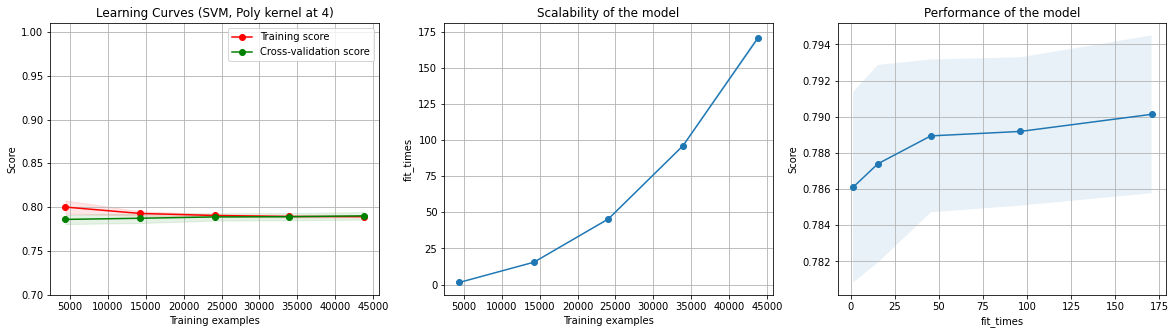

In [ ]:
clf = svm.SVC(kernel = 'poly',degree=4)
clf.fit(X3_train, y1_train)
print(clf.score(X3_train, y1_train))
print(clf.score(X3_test, y1_test))
cv_scores = cross_val_score(clf, X, y, cv=10)
print(cv_scores)
print('SVC cv_scores mean:{}'.format(np.mean(cv_scores)))
title = r"Learning Curves (SVM, Poly kernel at 4)"
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

plot_learning_curve(
    clf, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)
plt.show()

In [ ]:
clf = svm.NuSVC(kernel = 'linear')
clf.fit(X3_train, y1_train)
print(clf.score(X3_train, y1_train))
print(clf.score(X3_test, y1_test))
cv_scores = cross_val_score(clf, X, y, cv=10)
print(cv_scores)
print('SVC cv_scores mean:{}'.format(np.mean(cv_scores)))

0.7865075469382746
0.7894113983182809
[0.78729963 0.78787256 0.79650565 0.78150051 0.78828366 0.78746146
 0.78170606 0.78355601 0.77903392 0.79979445]
SVC cv_scores mean:0.78730139158006


In [ ]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
clf = svm.SVC(kernel='poly',degree = 2)

#create a dictionary of all values we want to test for n_neighbors
grid_dictionary = {'C': np.arange(1,5,step=0.5)}


#use gridsearch to test all values for n_neighbors
GScv = GridSearchCV(clf, grid_dictionary, cv=20)

#fit model to data
GScv.fit(X,y)

print(GScv.best_params_)

{'C': 1.0}


In [ ]:

corr = all_no_outliers.corr()
weighted = all_no_outliers.copy()
weighted2 = all_no_outliers.copy()

for attribute in corr.columns:
    correlation = corr.iloc[0][attribute]
    weighted[attribute] = abs((weighted[attribute])/correlation)
for i in range(len(all_no_outliers.columns) - 1):
    coefficient = coef[0][i]
    weighted2.iloc[:, i] = weighted2.iloc[:, i]/coefficient
for attribute in weighted.columns:
    min = weighted[attribute].min()
    max = weighted[attribute].max()
    divider = max - min
    weighted[attribute] = ((weighted[attribute]-min)/divider)
    min = weighted2[attribute].min()
    max = weighted2[attribute].max()
    divider = max - min
    weighted2[attribute] = ((weighted2[attribute]-min)/divider)
    
#print(weighted)



NameError: ignored

In [ ]:
X_weighted = np.array(weighted.iloc[:, 1:])
y_weighted = np.array(weighted.iloc[:, 0])
X_weighted2 = np.array(weighted2.iloc[:, 1:])
y_weighted2 = np.array(weighted2.iloc[:, 0])

Xw_train, Xw_test, yw_train, yw_test = train_test_split(X_weighted, y_weighted, test_size=0.33)
Xw2_train, Xw2_test, yw2_train, yw2_test = train_test_split(X_weighted2, y_weighted2, test_size=0.33)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(Xw_train, yw_train)
print(knn.score(Xw_train, yw_train))
print(knn.score(Xw_test, yw_test))
cv_scores = cross_val_score(knn, X, y, cv=10)
print(cv_scores)
print('Weighted 33 KNN cv_scores mean:{}'.format(np.mean(cv_scores)))
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(Xw2_train, yw2_train)
print(knn.score(Xw2_train, yw2_train))
print(knn.score(Xw2_test, yw2_test))
print('Weighted2 33 KNN cv_scores mean:{}'.format(np.mean(cv_scores)))


0.7910786599582771
0.7770787916536904
[0.77044801 0.77677287 0.78006166 0.77225077 0.78335046 0.77738952
 0.77368962 0.77081192 0.77451182 0.78458376]
Weighted 33 KNN cv_scores mean:0.7763870411509439
0.7918763038409621
0.7744627841793834
Weighted2 33 KNN cv_scores mean:0.7763870411509439


In [ ]:
# from sklearn.model_selection import GridSearchCV

# #create new a knn model
# new_knn = KNeighborsClassifier(weights='distance')

# #create a dictionary of all values we want to test for n_neighbors
# grid_dictionary = {'n_neighbors': np.arange(1,50)}


# #use gridsearch to test all values for n_neighbors
# GScv = GridSearchCV(new_knn, grid_dictionary, cv=20)

# #fit model to data
# GScv.fit(X_weighted ,y_weighted)

# new_knn = KNeighborsClassifier(weights='distance')

# #create a dictionary of all values we want to test for n_neighbors
# grid_dictionary = {'n_neighbors': np.arange(1,50)}
# print(GScv.best_params_)

# new_knn2 = KNeighborsClassifier()
# grid_dictionary = {'n_neighbors': np.arange(1,50)}


# #use gridsearch to test all values for n_neighbors
# GScv = GridSearchCV(new_knn, grid_dictionary, cv=20)

# #fit model to data
# GScv.fit(X_weighted2,y_weighted2)

# new_knn = KNeighborsClassifier(weights='distance')

# #create a dictionary of all values we want to test for n_neighbors
# grid_dictionary = {'n_neighbors': np.arange(1,50)}
# print(GScv.best_params_)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=47)
knn.fit(Xw_train, yw_train)
print(knn.score(Xw_train, yw_train))
print(knn.score(Xw_test, yw_test))
cv_scores = cross_val_score(knn, X, y, cv=10)
print(cv_scores)
print('Weighted 47 KNN cv_scores mean:{}'.format(np.mean(cv_scores)))
knn = KNeighborsClassifier(n_neighbors=47)
knn.fit(Xw2_train, yw2_train)
print(knn.score(Xw2_train, yw2_train))
print(knn.score(Xw2_test, yw2_test))
print('Weighted2 47 KNN cv_scores mean:{}'.format(np.mean(cv_scores)))

0.7896367652472696
0.7780753659296169
[0.77044801 0.77965057 0.78478931 0.77225077 0.78581706 0.78067831
 0.77780062 0.77410072 0.77615622 0.78890031]
Weighted 47 KNN cv_scores mean:0.7790591891468329
0.7899742299668671
0.7762067891622547
Weighted2 47 KNN cv_scores mean:0.7790591891468329
